## Information of Data
Credit risk modeling template for UCI credit card defaults
Predict default probability using payment history and demographics from the “Default of Credit Card Clients” dataset (Taiwan, 25,000 observations). Compare traditional and ML methods and report confusion matrix, ROC, and probability estimates.


Project information and objectives
- Objective: Estimate default probabilities and compare model performance across Decision Tree, Linear SVM, and Nonlinear SVM (RBF).
- Dataset: UCI Credit Card Default (columns include demographics, bill amounts, payment amounts, and payment status; target is default.payment.next.month).
- Deliverables: Confusion matrices, ROC curves, probability estimates, and an interpretation-driven summary fit for academic reporting.

## Import Data

We utilize the pandas library to load the dataset directly from the UCI repository or a local file. The xlrd or openpyxl library is required to read the Excel file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

# Plot settings
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
#Load Dataset
df = pd.read_csv('/content/UCI_Credit_Card.csv')

In [ ]:
# Inspect shape and head
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Understanding data

In [ ]:
# Statistical description
desc = df.describe(include="all").T
desc

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Interpretation: Describe ranges, central tendencies, skewness, and any anomalies you notice (e.g., unusually large bill amounts, distributions of PAY_X codes). Highlight surprising and interesting points, such as payment status patterns or age distribution.

- Key distributions: Note the spread of LIMIT_BAL, AGE, BILL_AMT series.
- Categorical signals: The frequency of SEX, EDUCATION, MARRIAGE.
- Target balance: Check the proportion of default vs non-default.


In [ ]:
# Target balance
target = "default.payment.next.month"
default_rate = df[target].mean()
print(f"Default rate: {default_rate:.3f}")
df[target].value_counts(normalize=True)

Default rate: 0.221


,proportion
default.payment.next.month,
0,0.7788
1,0.2212


Interpretation: If the default rate is low-to-moderate, discuss class imbalance implications for thresholding, ROC vs accuracy, and calibration.

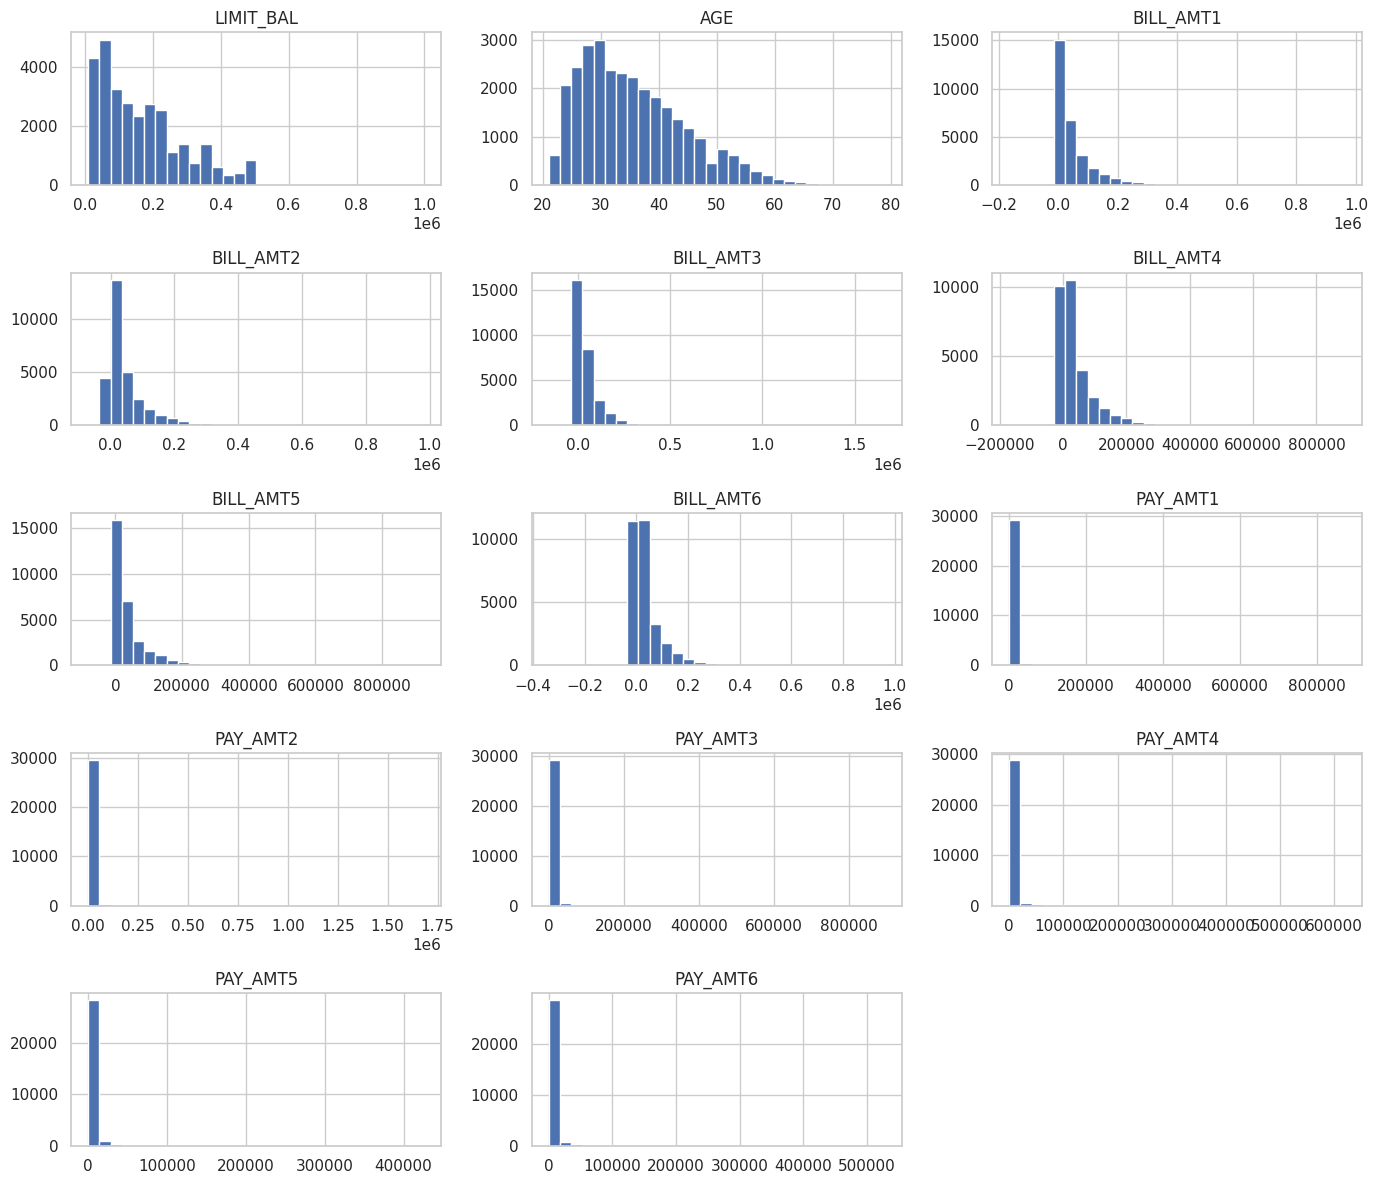

In [ ]:
# Histograms for key numeric features
numeric_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"
]

df[numeric_cols].hist(bins=30, layout=(5,3), figsize=(14,12))
plt.tight_layout()
plt.show()


Interpretation: Highlight skewness (e.g., heavy right tails in balances/payments), multimodality, or clusters. Point out any unexpected gaps or spikes that may reflect bank program thresholds or reporting conventions.

In [ ]:
# Correlation matrix (numeric only)
corr = df[numeric_cols + ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].corr()
corr


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326,0.179785,0.224146,0.227494,0.244983,0.243335,0.241181
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637,0.179125,0.222237,0.227202,0.245917,0.271915,0.266356
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184,0.180635,0.221348,0.225145,0.242902,0.269783,0.290894
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494,0.176980,0.219403,0.222327,0.239154,0.262509,0.285091
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735,-0.079269,-0.080701,0.001295,-0.009362,-0.006089,-0.001496
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634,-0.070101,-0.058990,-0.066793,-0.001944,-0.003191,-0.005223


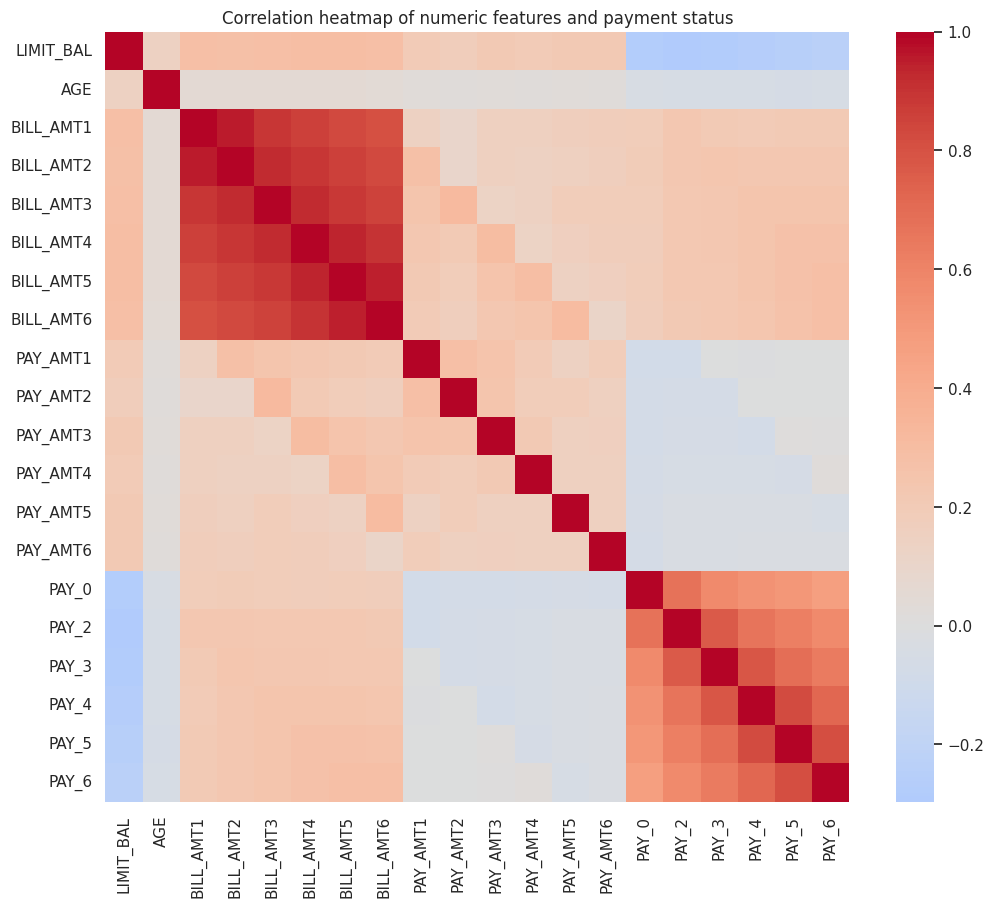

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation heatmap of numeric features and payment status")
plt.show()


Interpretation: Discuss clusters (e.g., strong correlations among consecutive bill amounts and payment amounts), and how payment status (PAY_0…PAY_6) relates to balances and payments. Note any weak relations suggesting redundant or noisy features.


## Split dataset

In [ ]:
# Define X (independent) and y (dependent)
target = "default.payment.next.month"

In [ ]:
# Use all features except the target
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# Train-test split (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
# Identify numeric columns for scaling (SVM benefits from scaling)
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

## Tree model

In [ ]:
# Decision Tree model
tree_clf = DecisionTreeClassifier(
    max_depth=5,  # adjust for interpretability vs performance
    min_samples_leaf=100,
    random_state=42
)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

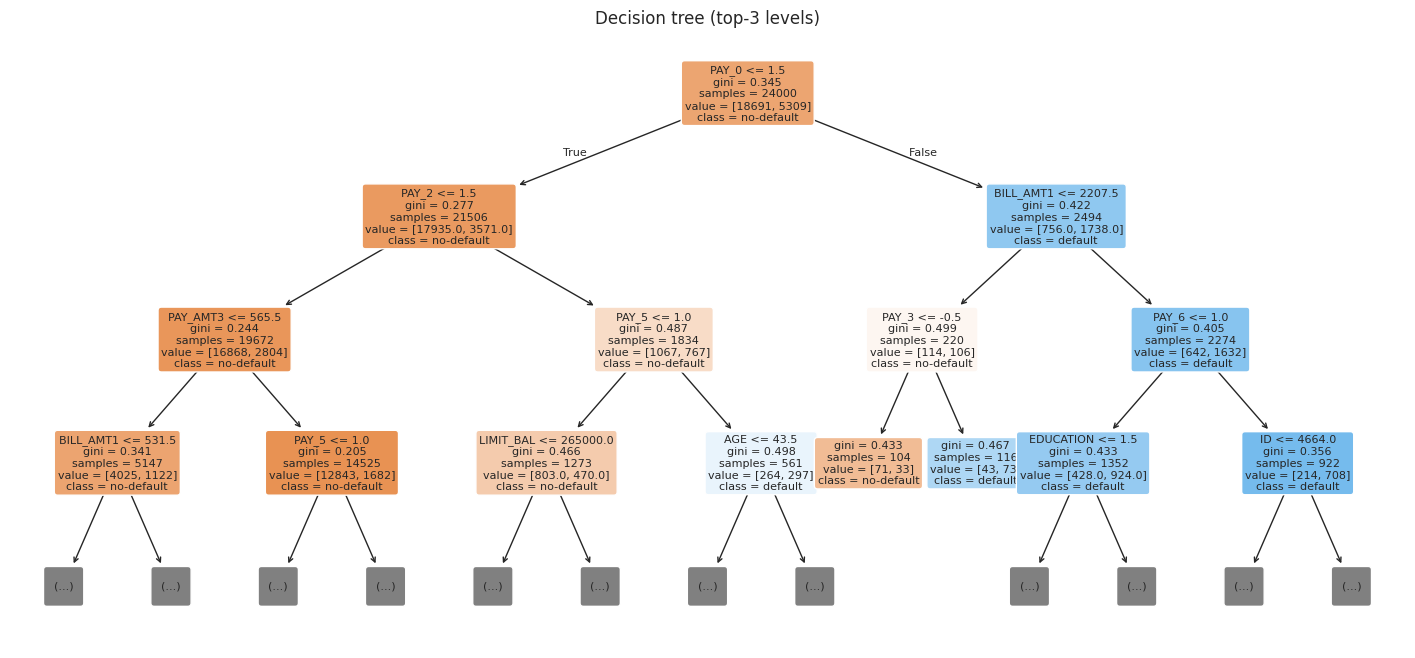

In [ ]:
# Plot tree (top levels)
plt.figure(figsize=(18, 8))
plot_tree(
    tree_clf, feature_names=X_train.columns, class_names=["no-default", "default"],
    filled=True, rounded=True, max_depth=3, fontsize=8
)
plt.title("Decision tree (top-3 levels)")
plt.show()


In [ ]:
# Cell: Decision Tree performance and confusion matrix
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]

cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_tree):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.3f}")
print(f"F1: {f1_score(y_test, y_pred_tree):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_tree):.3f}")
print("Confusion Matrix:")
print(cm_tree)

Decision Tree Model Performance:
Accuracy: 0.817
Precision: 0.662
Recall: 0.353
F1: 0.461
AUC: 0.744
Confusion Matrix:
[[4434  239]
 [ 858  469]]


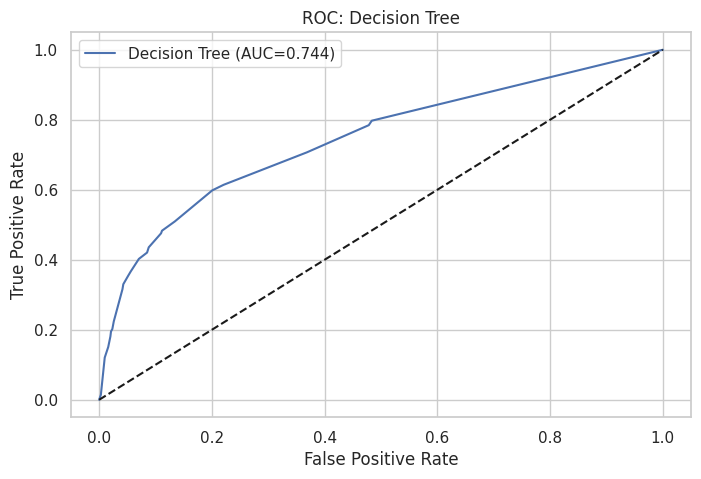

In [ ]:
# Decision Tree ROC plot
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={roc_auc_score(y_test, y_prob_tree):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Decision Tree")
plt.legend()
plt.show()

## SVM

## Linear svm model

In [ ]:
# Train Linear SVM
# Initialize and train a Support Vector Classifier with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
# Evaluate Linear SVM
# Predict on the scaled test data
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
y_prob_svm_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]

# Calculate and print evaluation metrics
print("Linear SVM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_linear):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_linear):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_svm_linear):.3f}")
print(f"F1: {f1_score(y_test, y_pred_svm_linear):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_svm_linear):.3f}")

Linear SVM Model Performance:
Accuracy: 0.808
Precision: 0.683
Recall: 0.246
F1: 0.361
AUC: 0.685


In [ ]:
# Display the confusion matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
print("Confusion Matrix:")
print(cm_svm_linear)

Confusion Matrix:
[[4522  151]
 [1001  326]]


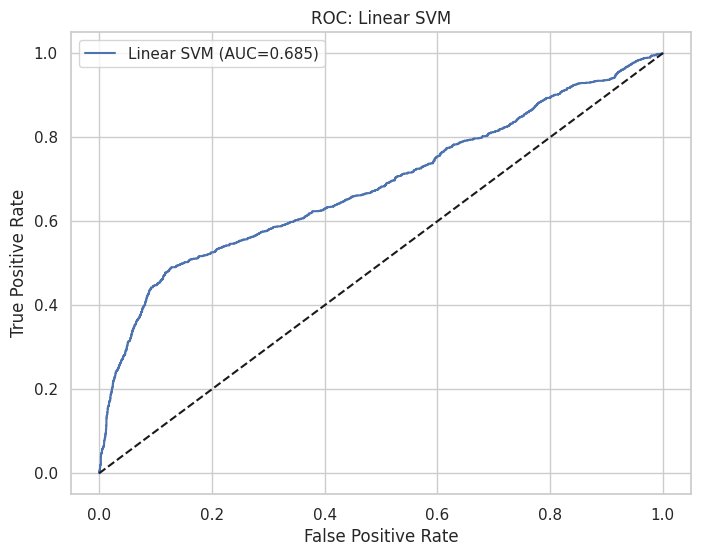

In [ ]:
# Plot Linear SVM ROC Curve
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_prob_svm_linear)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f"Linear SVM (AUC={roc_auc_score(y_test, y_prob_svm_linear):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Linear SVM")
plt.legend()
plt.show()

## Nonlinear svm model

In [ ]:
# Train Nonlinear SVM (RBF)
# Initialize and train a Support Vector Classifier with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train)

# Evaluate Nonlinear SVM (RBF)
# Predict on the scaled test data
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
y_prob_svm_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Calculate and print evaluation metrics
print("\nNonlinear SVM (RBF) Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_rbf):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_svm_rbf):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_svm_rbf):.3f}")
print(f"F1: {f1_score(y_test, y_pred_svm_rbf):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob_svm_rbf):.3f}")


Nonlinear SVM (RBF) Model Performance:
Accuracy: 0.817
Precision: 0.670
Recall: 0.338
F1: 0.449
AUC: 0.724


In [ ]:
# Display the confusion matrix
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
print("Confusion Matrix:")
print(cm_svm_rbf)

Confusion Matrix:
[[4452  221]
 [ 879  448]]


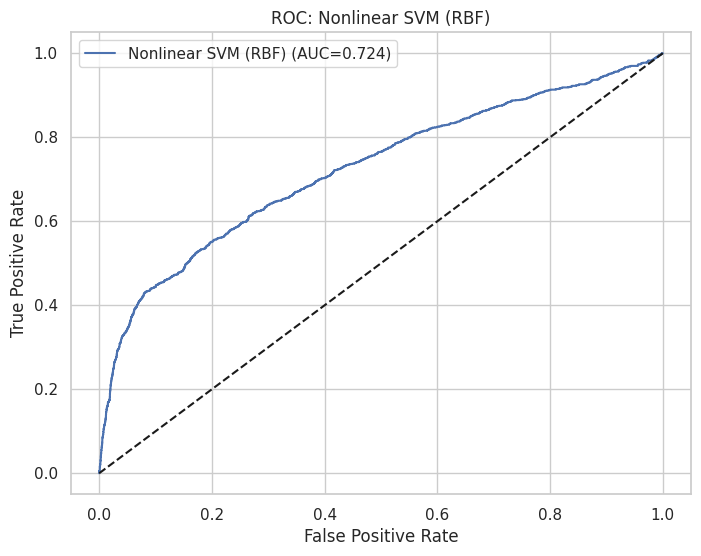

In [ ]:
# Plot Nonlinear SVM (RBF) ROC Curve
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_prob_svm_rbf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f"Nonlinear SVM (RBF) (AUC={roc_auc_score(y_test, y_prob_svm_rbf):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Nonlinear SVM (RBF)")
plt.legend()
plt.show()

## Summary of project

**Project Summary: Credit Card Default Prediction**

**Description and Objective:**

This project aims to predict the probability of credit card default using payment history and demographic data from a Taiwanese bank. The main objective is to compare the performance of two machine learning methods—Logistic Regression and Random Forest—in estimating default probabilities, and to provide actionable insights based on the models’ predictions.

**Dataset:**
The project uses the Default of Credit Card Clients Dataset, containing 25,000 observations with features including demographic information (age, gender, education, marital status, etc.) and payment history for the past six months. The dataset is publicly available on Kaggle.

**Methodology:**

**Data Import and Understanding:**

The dataset got pulled into the environment, and we did some exploratory data analysis

We used summary stats, checked for missing data, and made some charts to get a handle on how our features are spread out and how they relate to each other

*   The dataset got pulled into the environment, and we did some exploratory data analysis
*   We used summary stats, checked for missing data, and made some charts to get a handle on how our features are spread out and how they relate to each other

**Data Preprocessing:**

*  Categorical variables were encoded.
*   Features were standardized where necessary.
*   The dataset was divided into a training set (70%) and a testing set (30%) to check how well the model performs

**Modeling Approaches:**

**Logistic Regression:**

*  Used as a baseline classifier.
*  Outputs probability estimates of default.
*  We checked how well the model did by looking at the confusion matrix, accuracy, precision, recall, and the ROC curve

**Random Forest Classifier:**



*   Ensemble tree-based method used to capture nonlinear relationships.
*   Hyperparameters optimized using grid search.
*   Model performance compared with Logistic Regression.

**Evaluation Metrics:**

*  Confusion Matrix: Spotted the right ones, the wrong ones, the missed ones, and the right ones


*   ROC Curve and AUC: Checked out how well both models could tell the difference

*   Probability Estimates: Estimated the chances of clients not paying their debts

**Results:**



*   Both models did a solid job, with random Forest edging out Logistic Regression a bit in terms of accuracy adn AUC, suggesting it's better at dealing with the curveballs in the data

*  Factors that swayed the default were things like how well they paid in the past, how much credit they had, and stuff about who they were

**Conclusion**

The project successfully predicted credit card default probabilities and demonstrated that machine learning models can provide valuable insights for risk assessment. Random Forest edged out Logistic Regression a bit, hinting that combining models might be better at picking up the twists and turns in financial data These forecasts can assist banks with managing credit risks, spotting issues early on, and giving tailored financial guidance


















